In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
#Load the Data
data = pd.read_csv("pima_data_diabetes.csv")

#Replace zeros with NaN for selected columns
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

#Drop missing values
data.dropna(inplace=True)

# Optional: Drop unnecessary columns
data = data.drop(columns=['BloodPressure', 'DiabetesPedigreeFunction'])

In [3]:
#Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

In [6]:
#Train Models
tree_model = DecisionTreeClassifier(random_state=42)
NB_model = GaussianNB()
tree_model.fit(x_train, y_train)
NB_model.fit(x_train, y_train)

GaussianNB()

In [7]:
# Predictions
tree_pred = tree_model.predict(x_test)
NB_pred = NB_model.predict(x_test)

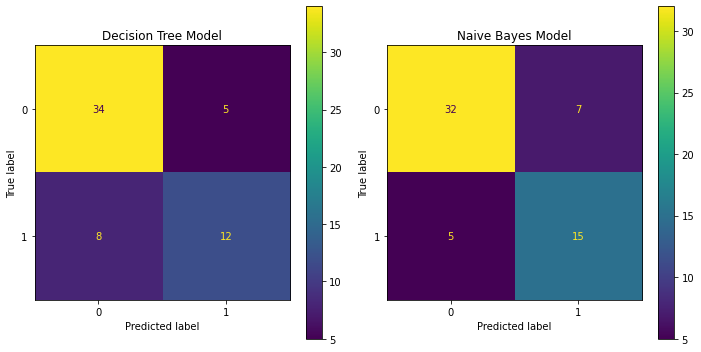

In [11]:
#Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y_test, tree_pred, ax=axs[0])
axs[0].set_title("Decision Tree Model")

ConfusionMatrixDisplay.from_predictions(y_test, NB_pred, ax=axs[1])
axs[1].set_title("Naive Bayes Model")

plt.tight_layout()
plt.show()

In [15]:
#Evaluation metrics 
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  # Same as recall for positive class
    specificity = tn / (tn + fp)

    print(f"--- {model_name} ---")
    print(f"Accuracy   : {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print()

    return cm

cm_tree = evaluate_model(y_test, tree_pred, "Decision Tree")
cm_NB = evaluate_model(y_test, NB_pred, "Naive Bayes")

--- Decision Tree ---
Accuracy   : 0.7797
Sensitivity: 0.6000
Specificity: 0.8718

--- Naive Bayes ---
Accuracy   : 0.7966
Sensitivity: 0.7500
Specificity: 0.8205



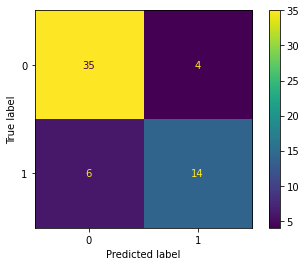

In [16]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(x_train, y_train)
RF_pred = RF_model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, RF_pred)